In [10]:
#use base environment
import pandas as pd
import icecream as ic
import numpy as np
import plotly
import matplotlib as plt
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
# from chemicalchecker import ChemicalChecker
# cc = ChemicalChecker()

from standardiser import unsalt, neutralise,rules
from standardiser.rules_demo import show_change

import e3fp
from e3fp.pipeline import confs_from_smiles

import six

import warnings

import sys
import re
import random
 
from ipywidgets import HTML

import pandas as pd
 
from rdkit import Chem
from rdkit.Chem import Draw, PandasTools, AllChem
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (450, 200)
PandasTools.RenderImagesInAllDataFrames()

In [8]:
#import setting from Standardizer
from __future__  import print_function, division, absolute_import

import six

import warnings

import sys
import re
import random
 
from ipywidgets import HTML

import pandas as pd
 
from rdkit import Chem
from rdkit.Chem import Draw, PandasTools, AllChem
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (450, 200)
PandasTools.RenderImagesInAllDataFrames()

from qed import qed

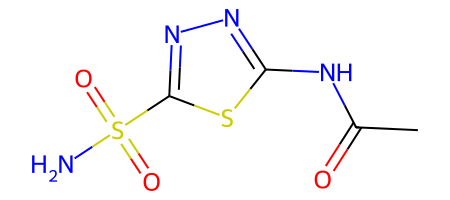

In [6]:
Acetazolamide = "CC(=O)NC1=NN=C(S1)S(=O)(=O)N"
mol = Chem.MolFromSmiles(Acetazolamide)

# Default
mol

https://chemicalchecker.org/explore/BZKPWHYZMXOIDC-UHFFFAOYSA-N

In [9]:
qed.default(mol)

TypeError: unsupported operand type(s) for -: '_vectNSt3__16vectorIiNS_9allocatorIiEEEE' and 'float'

In [6]:
from qed import qed
from rdkit import Chem
m = Chem.MolFromSmiles('c1ccccc1')
qed.default(m)

0.44619898311523704

In [7]:
qed

<module 'qed.qed' from '/Users/linfengwang/opt/anaconda3/lib/python3.8/site-packages/qed/qed.py'>

Standardization

In [3]:
#Using standardizer (https://github. com/flatkinson/standardiser)
#unsalt
# The unsalt module identifies counterions and solvate components, such that they can be removed. It does not do the removal itself, as each component is put through the whole standardization pipeline before counterions and/or solvate components are identified. Note that any component containing an non-organic element is removed before the standardization pipeline is applied.
non_salt_frags = []

for frag in Chem.GetMolFrags(mol, asMols=True):
    if unsalt.is_nonorganic(frag): continue # Looks for any 'non-organic' element
    if unsalt.is_salt(frag): continue       # Uses salt dictionary
    non_salt_frags.append(frag)
    
Draw.MolsToGridImage(non_salt_frags)

#neuralise
# This document describes the operation of the neutralize module, which attempts to balance charges via the removal and/or addition of protons.
mol = neutralise.run(non_salt_frags[0])

#Tautemers
# Tautomers are isomers of a molecule that exist in solution or in a cell. They are interchangeable forms because chemical bonds are rearranged many times spontaneously. 
# rules.logger.setLevel('DEBUG')
# rules.add_rule_set('tautomerism_and_aromaticity')
# HTML(show_change(mol))
# print(mol)

NameError: name 'mol' is not defined

In [27]:
#outputing Inchikey after standardization
from rdkit.Chem import inchi
inchikey = inchi.MolToInchiKey(mol)
print(inchikey)

BZKPWHYZMXOIDC-UHFFFAOYSA-N


In [ ]:
Chem.MolFromSmiles

A1: 2D fingerprints

In [36]:
#morgan finger print with radius of 2
# The Morgan fingerprint is basically a reimplementation of the extended conectivity fingerprint (ECFP). 
# 5)Extended-connectivity fingerprints (ECFPs) are a recently developed fingerprint methodology explicitly designed to capture molecular features relevant to molecular activity.
info = {}
morgan_fp = AllChem.GetMorganFingerprint(mol,2,bitInfo=info)
# print(morgan_fp)
len(morgan_fp.GetNonzeroElements())
info
# Information is available about the atoms that contribute to particular bits in the Morgan fingerprint via the bitInfo argument. The dictionary provided is populated with one entry per bit set in the fingerprint, the keys are the bit ids, the values are lists of (atom index, radius) tuples.

{43357009: ((1, 2),),
 411967733: ((1, 1),),
 437064736: ((5, 2),),
 464516944: ((8, 2),),
 847957139: ((12, 0),),
 847961216: ((3, 0),),
 864942730: ((2, 0), (10, 0), (11, 0)),
 999334238: ((9, 0),),
 1510328189: ((2, 1),),
 1790668568: ((3, 1),),
 1791271074: ((8, 1),),
 2041434490: ((5, 0), (6, 0)),
 2228063684: ((10, 1), (11, 1)),
 2246699815: ((1, 0),),
 2246728737: ((0, 0),),
 2829782699: ((4, 2),),
 2962271204: ((6, 2),),
 3058108901: ((7, 1),),
 3113855204: ((3, 2),),
 3217380708: ((4, 0), (7, 0)),
 3275683399: ((12, 1),),
 3351556771: ((8, 0),),
 3458774156: ((5, 1), (6, 1)),
 3462308225: ((4, 1),),
 3532053313: ((9, 1),),
 3545365497: ((0, 1),),
 3568423283: ((9, 2),),
 3888968293: ((7, 2),)}

A2: 3D fingerprints

In [30]:
#3D fingerprints. The 1,024-bit E3FP fingerprints 
# 3D molecular fingerprinting method inspired by Extended Connectivity FingerPrints (ECFP) 2, integrating tightly with the RDKit
from e3fp.config.params import read_params
from e3fp.pipeline import fprints_from_mol

config = read_params("e3fp/new_params.cfg")

confgen_params = {'max_energy_diff': 20.0, 'first': 3}
fprint_params = {'bits': 1024, 'radius_multiplier': 2, 'rdkit_invariants': True}

conformer = confs_from_smiles(Acetazolamide, "Acetazolamide", confgen_params=confgen_params)
# conformer.GetNumConformers()

fprints = fprints_from_mol(conformer, fprint_params=fprint_params)
print(fprints)

2022-10-15 16:14:20,760|INFO|Generating conformers for Acetazolamide.
2022-10-15 16:14:21,077|INFO|Generated 3 conformers for Acetazolamide.
2022-10-15 16:14:21,078|INFO|Generating fingerprints for Acetazolamide.
2022-10-15 16:14:21,207|INFO|Generated 3 fingerprints for Acetazolamide.


[Fingerprint(indices=array([12, 98, 149, 188, 309, 328, 334, 396, 473, 549, 561, 565, 600, 620, 637, 652, 666, 709, 763, 778, 797, 837, 847, 864, 876, 909, 1017]), level=5, bits=1024, name=Acetazolamide_0), Fingerprint(indices=array([12, 98, 113, 188, 274, 309, 328, 334, 396, 405, 473, 507, 549, 561, 565, 600, 620, 637, 652, 666, 709, 763, 778, 797, 876, 882, 909]), level=5, bits=1024, name=Acetazolamide_1), Fingerprint(indices=array([12, 26, 30, 94, 98, 149, 187, 188, 309, 334, 473, 560, 561, 565, 600, 637, 652, 666, 672, 709, 763, 771, 778, 797, 837, 847, 876, 909]), level=5, bits=1024, name=Acetazolamide_2)]


A3: scaffolds



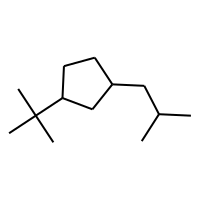

In [31]:
#Murcko’s scaffold
# This method employs a more systematical way to dissect a molecule into four parts: ring systems, linkers, side chains, and the Murcko framework that is the union of ring systems and linkers in a molecule.
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol,MakeScaffoldGeneric

Mscaffold = Chem.MolToSmiles(GetScaffoldForMol(mol))
# Chem.MolToSmiles(Mscaffold)
#molecular framework
mol_Mscaffold = Chem.MolFromSmiles(Mscaffold)
fw = MakeScaffoldGeneric(mol)
print(fw)

A4: structural keys

In [32]:
from rdkit.Chem import MACCSkeys
from rdkit import DataStructs
# MACCS keys are used to compute molecular similarity for computational drug design and database matching. This function follows the RDKit implementation of the 166-bit MACCS keys.
fps = MACCSkeys.GenMACCSKeys(mol)
print(fps)

A5: physicochemical parameters

In [41]:
from rdkit.Chem import Descriptors, rdMolDescriptors, rdchem, Crippen,Lipinski
from rdkit.Chem.rdchem import StereoType
#molecular weight, 
mw = Descriptors.ExactMolWt(mol)
print("mw")
print(mw)
print("="*20)
# number of heavy atoms
nHeavy = rdMolDescriptors.CalcNumHeavyAtoms(mol)
print("nHeavy")

print(nHeavy)
print("="*20)

# number of heteroatoms
nHetero = rdMolDescriptors.CalcNumHeteroatoms(mol) 
print("nHetero")

print(nHetero)
print("="*20)

# number of rings
nRing = rdMolDescriptors.CalcNumRings(mol) 
print("nRing")

print(nRing)
print("="*20)

# number of aliphatic rings 
nAliphatic = rdMolDescriptors.CalcNumAliphaticRings(mol)
print("nAliphatic")
print(nAliphatic)
print("="*20)

# number of aromatic rings

nAromatic = rdMolDescriptors.CalcNumAromaticRings(mol)
print("nAromatic")
print(nAromatic)
print("="*20)

# number of hydrogen bond acceptors
nHBA = rdMolDescriptors.CalcNumHBA(mol)
print("nHBA")
print(nHBA)
print("="*20)

#! GetNumBonds
#nAliphatic = rdchem.GetBonds(mol)
# double = StereoType.Bond_Double(mol)
rotatable = Lipinski.NumRotatableBonds(mol)
nBond =rotatable #+ double 
print("nBond")
print(nBond)
print("="*20)

# number of hydrogen bond donors 
nHBD = rdMolDescriptors.CalcNumHBD(mol)
print("nHBD")
print(nHBD)
print("="*20)

# number of rotatable bonds
nRotatable = rdMolDescriptors.CalcNumRotatableBonds(mol)
print("nRotatable")
print(nRotatable)
print("="*20)

# logP
logP = Crippen.MolLogP(mol)
print("logP")
print(logP)
print("="*20)

#! molecular refractivity

# polar surface area

psurface = rdMolDescriptors.CalcTPSA(mol)
print("psurface")
print(psurface)
print("="*20)

#Structural alert
# Parts of organic molecules which are believed to be responsible for adverse effects (e.g. genotoxicity) and can be used to predict the toxicity of similar compounds.
def chemicalAlert(query):
    alert_df = pd.read_csv("DB/alert_collection.csv")
    for x in alert_df['smarts']:
        if x in query:
            return True
        else:
            return False 

alert = chemicalAlert(Acetazolamide)
print("structural alert")
print(alert)

print("="*20)
#Lipinski’s rule-of-five violations
# Molecular weight <= 500
# LogP <= 5
# H-bond donor count <= 5
# H-bond acceptor count <= 10
rule_of_five = [mw <= 500,logP <= 5,nHBD <=5,nHBA <=5]
r5 = all(item is True for item in rule_of_five)
print("r5")
print(r5)
print("="*20)

#rule-of-three violations
# molecular weight of a fragment is <300
# the v is ≤3
# the number of hydrogen bond donors is ≤3
# the number of hydrogen bond acceptors is ≤3.
rule_of_three = [mw <= 300,logP <= 3,nHBD <=3,nHBA <=3]
r3 = all(item is True for item in rule_of_three)
print("r3")
print(r3)
print("="*20)

#chemical beauty (QED)
from qed import qed
QED = qed.weights_max(mol)
print("QED")
print(QED)
print("="*20)


mw
221.988132052
nHeavy
13
nHetero
9
nRing
1
nAliphatic
0
nAromatic
1
nHBA
6
nBond
2
nHBD
2
nRotatable
2
logP
-0.8561000000000003
psurface
115.04
structural alert
False
r5
False
r3
False
QED
0.6708401455830934


In [7]:
from qed import qed
QED = qed.weights_max(mol)

TypeError: unsupported operand type(s) for -: '_vectNSt3__16vectorIiNS_9allocatorIiEEEE' and 'float'